<a href="https://colab.research.google.com/github/shivam-ctrl/Statistical-Data-Analysis-on-Social-Network-Ad-Data/blob/main/Shivam_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Social Network Ad Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraires**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 

**Importing Dataset**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Social_Network_Ads.csv')

In [ ]:
dataset = dataset.iloc[:,1:]
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0.0
1,Male,35.0,20000.0,0.0
2,Female,26.0,43000.0,0.0
3,Female,27.0,57000.0,0.0
4,Male,19.0,76000.0,0.0


The dataset consists the data of all those who visited the Ad. And my analysis would be around the fact that whether the person purchased the product or not. It would be helpful for selecting the target customers.

In [ ]:
print(dataset.isnull().sum())

Gender             36
Age                30
EstimatedSalary    16
Purchased          11
dtype: int64


**Missing Data Handling**

In [ ]:
dataset = dataset.fillna(method = 'ffill', axis = 0)

In [ ]:
print(dataset.isnull().any())

Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool


**Statistics**

In [ ]:
buyers = dataset[dataset['Purchased'] == 1] # data of buyers

In [ ]:
buyers.head()

,Gender,Age,EstimatedSalary,Purchased
7,Female,32.0,150000.0,1.0
16,Male,47.0,25000.0,1.0
17,Male,45.0,26000.0,1.0
18,Male,46.0,28000.0,1.0
19,Female,48.0,29000.0,1.0


**Age Based Analysis**

In [ ]:
dataset['Age'].describe()

count    400.000000
mean      37.922500
std       10.323174
min       18.000000
25%       30.000000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

Observing the mean and quartile deviations of the age column, we can conclude that the AD was visited mostly by adults in their late 30s to early 40s.

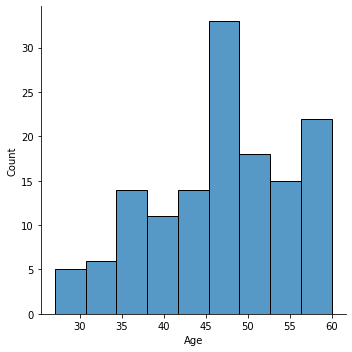

In [ ]:
sns.displot(buyers['Age'])

Most buyers were between the age group 45-50.

**Salary Based Analysis**

In [ ]:
dataset['EstimatedSalary'].describe()

count       400.000000
mean      68875.000000
std       33629.849717
min       15000.000000
25%       43000.000000
50%       69500.000000
75%       86000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

Looking at the statistics of the EstimatedSalary column we can see that the middle class have shown their interest in the product.

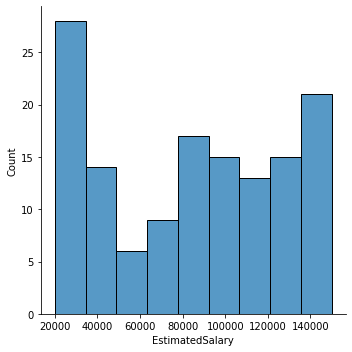

In [ ]:
sns.displot(buyers['EstimatedSalary'])

The buyers were more on the later half of the salary scale(higher salary) but the most buyers were in the salary range 20000 to 35000 which has increased the count of the people with lower salary and therefore we cannot neglect the one's with less salary.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


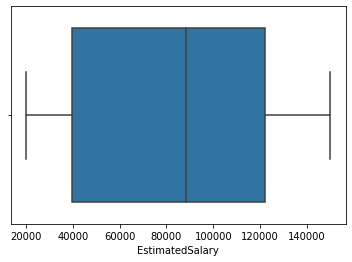

In [ ]:
sns.boxplot('EstimatedSalary', data=buyers)

**Purchase Based Analysis**

In [ ]:
dataset['Purchased'].describe()

count    400.000000
mean       0.345000
std        0.475964
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Purchased, dtype: float64

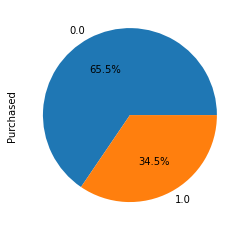

In [ ]:
(dataset.groupby(['Purchased'])['Purchased'].count()).plot.pie(autopct="%.1f%%")

Seeing the mean of the purchased column we can see that 34.5% of the people who saw the AD actually purchased the product.

**Gender Based Analysis**

In [ ]:
dataset.groupby(['Gender'])['Purchased'].sum()

Gender
Female    76.0
Male      62.0
Name: Purchased, dtype: float64

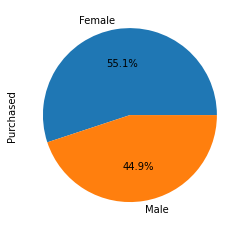

In [ ]:
(dataset.groupby(['Gender'])['Purchased'].sum()).plot.pie(autopct="%.1f%%")

Women have shown more interest on the product as 55% of the customers were women. 

**Categorical Data Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
genderEncoder = LabelEncoder()
dataset['Gender'] = genderEncoder.fit_transform(dataset['Gender'])

In [ ]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0.0
1,1,35.0,20000.0,0.0
2,0,26.0,43000.0,0.0
3,0,27.0,57000.0,0.0
4,1,19.0,76000.0,0.0


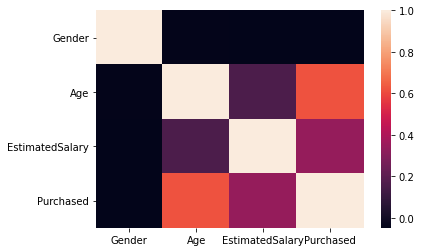

In [ ]:
sns.heatmap(dataset.corr())

Age is showing a better correlation(+ve) with Purchased and so we can conclude that with increase in age the interest towards the product increases.
So, we can say that we cannot target a perticular gender or focus on those with a perticular estimated salary as it it would be a bad model. Instead we can consider age as a criteria for our target because of its strong positive correlation with  